In [ ]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
import joblib

project_root = Path(os.getcwd())
sys.path.append(str(project_root))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src import *
from src.problems.config import config_fgt
from src.problems import *
from src.utils.optimizer import Optimizer
from src.utils.model_evaluation import ModelEval

In [11]:
# Example module config
module_config = {
    "perception": (BasePerception, {}),
    "memory": (BaseMemory, {
        "personal_memory_range": {
            "gamma": (0.05, 1.0),
            "w0": (0.075, 0.15)
        },
        "param_resolution": 20
    }),
    "cluster": (PartitionCluster, {
        "transition_spec": [("random_4", "top_posterior"),
                            ("opp_random_4", "random")]
    })
}
optimizer = Optimizer(module_config, n_jobs=10)

# 导入数据
processed_path = Path(project_root) / 'data'
optimizer.prepare_data(processed_path / 'Task2_processed.csv')

Error initializing module cluster: 'Optimizer' object has no attribute 'partition_model'


In [12]:
iSub = 1
results = optimizer.optimize_params_with_subs_parallel(
    config_fgt, [iSub], 16, 1, 1)

Processing tasks: 100%|███████████████████████████████████████████| 400/400 [00:29<00:00, 13.35it/s]


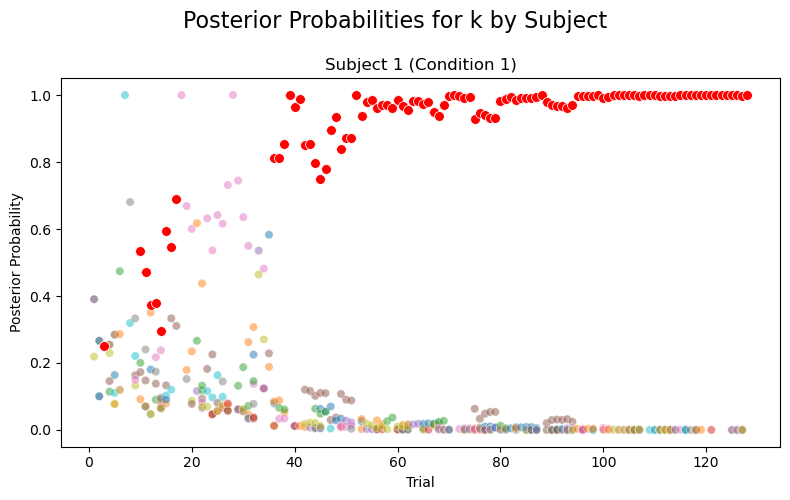

In [13]:
model_eval = ModelEval()
model_eval.plot_posterior_probabilities(results, [iSub])

In [14]:
optimizer.set_results(results)
prediction = optimizer.predict_with_subs_parallel(
    config_fgt, [iSub])

Predicting tasks:   0%|                                                       | 0/1 [00:00<?, ?it/s]

Predicting tasks: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 1225.33it/s]


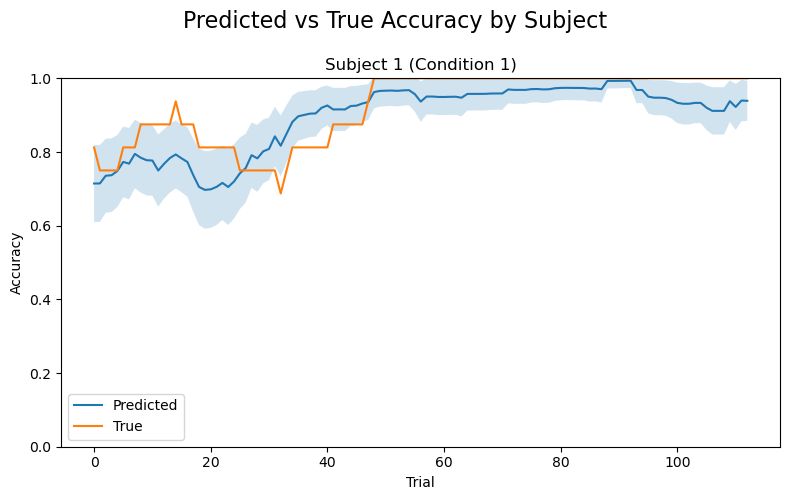

In [15]:
model_eval.plot_accuracy_comparison(prediction, [iSub])

In [ ]:
from src.utils.oral_process import Oral_to_coordinate
oral_to_coordinate = Oral_to_coordinate()

learning_data = pd.read_csv(Path(project_root) / 'data' / 'Task2_processed.csv')
oral_hypo_hits = oral_to_coordinate.get_oral_hypo_hits(learning_data)

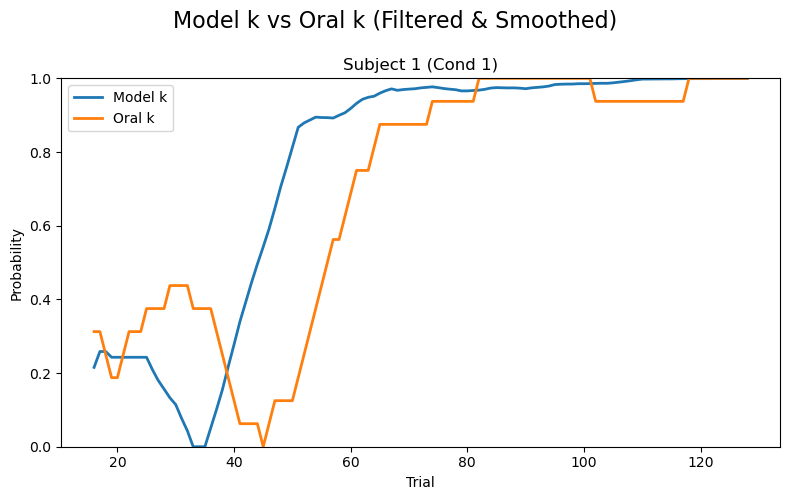

In [17]:
model_eval.plot_k_oral_comparison(results, oral_hypo_hits, [iSub])

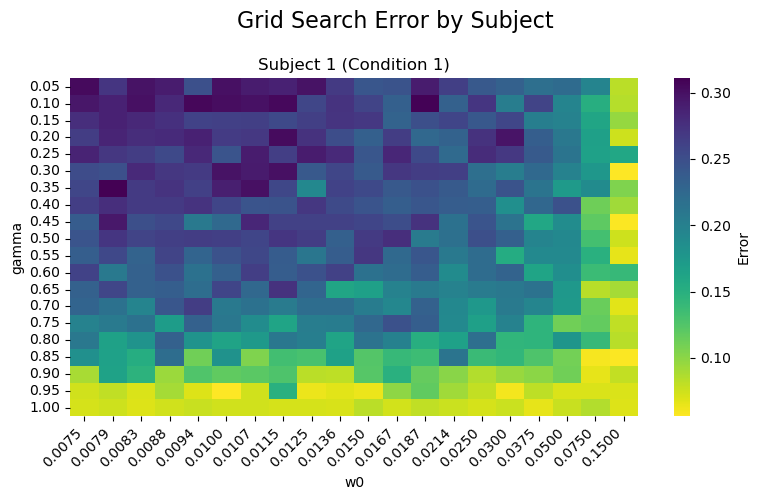

In [18]:
model_eval.plot_error_grids(results, fname=['gamma','w0'])

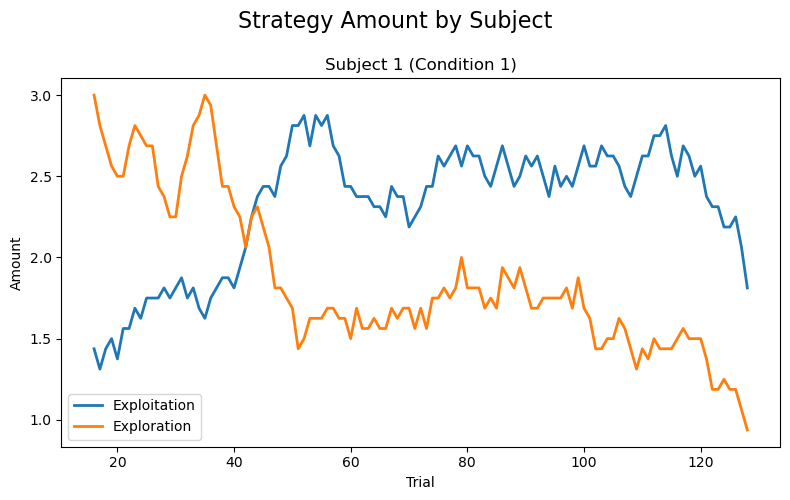

In [19]:
model_eval.plot_cluster_amount(results, 16, [iSub])